<a href="https://colab.research.google.com/github/amirpoorzahmatkesh/CS-SBU-eDataMining-MSc-2022/blob/400422050/amir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
root = '/gdrive/MyDrive/csv/'
pd.set_option('display.max_columns' , None)
data = pd.read_csv(root + 'csv_1.csv')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.9419,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43871 entries, 0 to 43870
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43871 non-null  int64  
 1   name                            43847 non-null  object 
 2   host_id                         43870 non-null  float64
 3   host_name                       43843 non-null  object 
 4   neighbourhood_group             43870 non-null  object 
 5   neighbourhood                   43870 non-null  object 
 6   latitude                        43870 non-null  float64
 7   longitude                       43870 non-null  object 
 8   room_type                       43870 non-null  object 
 9   price                           43870 non-null  float64
 10  minimum_nights                  43870 non-null  float64
 11  number_of_reviews               43870 non-null  float64
 12  last_review                     

In [ ]:
data.columns[(data.isna().sum())/len(data)>0.50]

Index([], dtype='object')

In [ ]:
for cols in data.columns :
  if data[cols].dtype =='int64' or data[cols].dtype == 'float64':
    data[cols] =(data[cols] - data[cols].mean())/data[cols].std()

In [ ]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,-1.920405,Clean & quiet apt home by the park,-0.914938,John,Brooklyn,Kensington,-1.522658,-73.97237,Private room,0.011078,-0.275069,-0.420727,2018-10-19,-0.572622,0.168077,2.084495
1,-1.920395,Skylit Midtown Castle,-0.914937,Jennifer,Manhattan,Midtown,0.452348,-73.98377,Entire home/apt,0.355110,-0.275069,0.265516,2019-05-21,-0.449977,-0.135555,2.007097
2,-1.920219,THE VILLAGE OF HARLEM....NEW YORK !,-0.914888,Elisabeth,Manhattan,Harlem,1.483304,-73.9419,Private room,0.015605,-0.183200,-0.592288,NaN,NaN,-0.211463,2.084495
3,-1.920188,Cozy Entire Floor of Brownstone,-0.914882,LisaRoxanne,Brooklyn,Clinton Hill,-0.822018,-73.95976,Entire home/apt,-0.260525,-0.275069,4.554532,2019-07-05,2.623369,-0.211463,0.760997
4,-1.919989,Entire Apt: Spacious Studio/Loft by central park,-0.914819,Laura,Manhattan,East Harlem,1.287720,-73.94399,Entire home/apt,-0.301266,0.138342,-0.420727,2018-11-19,-0.651981,-0.211463,-0.740514


In [ ]:
data.fillna(data._get_numeric_data().mean(),inplace = True)

In [ ]:
data.isna().sum()

id                                   0
name                                24
host_id                              0
host_name                           28
neighbourhood_group                  1
neighbourhood                        1
latitude                             0
longitude                            1
room_type                            1
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7707
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

0.0    21341
Name: availability_365, dtype: int64

In [ ]:
for cols in data.columns :
  if data[cols].dtype == 'bool' or data[cols].dtype == 'object':
    data[cols].fillna(data[cols].value_counts().head(1).index[0],inplace=True)

In [ ]:
data.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
for cols in data.columns:
  if data[cols].dtype == 'int64' or data[cols].dtype == 'float64' :
    upperRange = data[cols].mean()+3*data[cols].std()
    lowerRange = data[cols].mean() - 3 *data[cols].std()
    indexs = data[(data[cols]>upperRange) | (data[cols] < lowerRange)] .index
data2 =data.drop(indexs)
data2.shape

(43871, 16)

In [ ]:
# print('data dimensions:',data.shape)
# perc_missing_per_ftr = data.isnull().sum(axis=0)/data.shape[0]
# print(perc_missing_per_ftr)

data dimensions: (43871, 16)
id                                0.000000
name                              0.000547
host_id                           0.000023
host_name                         0.000638
neighbourhood_group               0.000023
neighbourhood                     0.000023
latitude                          0.000023
longitude                         0.000023
room_type                         0.000023
price                             0.000023
minimum_nights                    0.000023
number_of_reviews                 0.000023
last_review                       0.175674
reviews_per_month                 0.175674
calculated_host_listings_count    0.000023
availability_365                  0.000023
dtype: float64


In [ ]:
fig = px.pie(data, names='neighbourhood_group', title='share in neighborhood')
fig.show()

In [ ]:
data[['neighbourhood_group','price']].groupby(['neighbourhood_group'] , as_index = False).median().sort_values(by='price', ascending= False)

,neighbourhood_group,price
2,Manhattan,140.0
1,Brooklyn,94.0
3,Queens,75.0
4,Staten Island,75.0
0,Bronx,65.0


In [ ]:
data['host_name'].value_counts()


Michael          432
David            341
Sarah            261
Kara             244
Alex             242
                ... 
Alyssia            1
Radium             1
LiVi               1
Shaila & Alex      1
Jarryd             1
Name: host_name, Length: 7964, dtype: int64

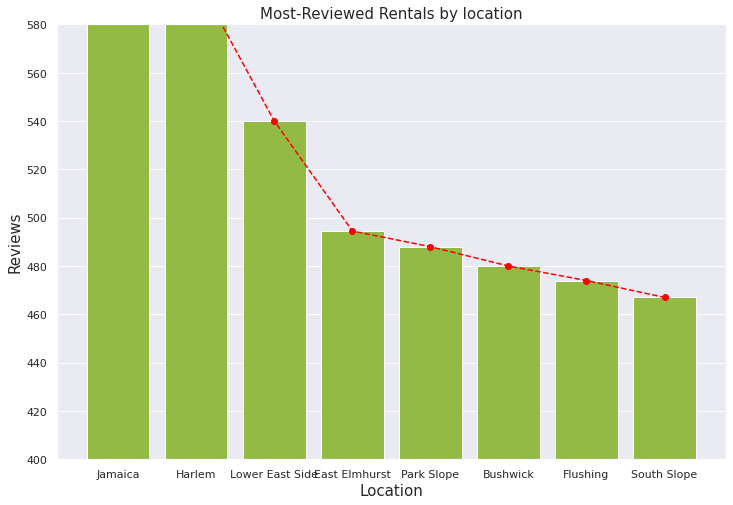

In [ ]:
review = data.sort_values('number_of_reviews',ascending=False)
top_reviewed = review.loc[:,['neighbourhood','number_of_reviews']][:20]
top_reviewed = top_reviewed.groupby('neighbourhood').mean().sort_values('number_of_reviews',ascending=False).reset_index()
fig4,ax3 = plt.subplots(figsize=(12,8))
sns.barplot(x=top_reviewed['neighbourhood'],y=top_reviewed['number_of_reviews'].values,color='yellowgreen',ax=ax3)
plt.plot(top_reviewed['number_of_reviews'], marker='o', color='red',linestyle='--')
plt.ylabel('Reviews', fontsize='15')
plt.xlabel('Location',fontsize='15')
plt.ylim((400,580))
plt.title('Most-Reviewed Rentals by location',fontsize='15')
plt.show()
sns.set()
import numpy as np
upper_east = data[data['neighbourhood'] == 'Upper East Side']
ninetieth_percentile = np.quantile(upper_east['number_of_reviews'], 0.85)
upper_east = upper_east[upper_east['number_of_reviews'] >= ninetieth_percentile]
upper_east = upper_east.sort_values('price',ascending=True)
private_room = upper_east[upper_east['room_type'] == 'Private room'].reset_index()
entire_home = upper_east[upper_east['room_type'] == 'Entire home/apt'].reset_index()
shared_room = upper_east[upper_east['room_type'] == 'Shared room'].reset_index()
private_cheapest = private_room.loc[0,:].reset_index()
private_cheapest.rename(columns={'index':'data','0':'values'},inplace=True)
entire_cheapest = entire_home.loc[0,:].reset_index()
entire_cheapest.rename(columns={'index':'data','0':'values'},inplace=True)

